In [1]:
import numpy as np
import matplotlib.pyplot as plt
import linear as lg

<ErrorbarContainer object of 3 artists>

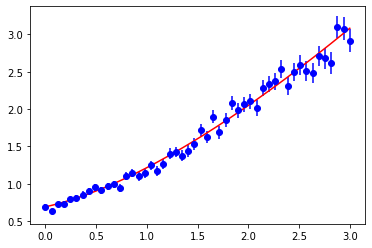

In [3]:
# The Hubble function for LCDM normalized to 100
def Hub(z,omh2,h2):
    return np.sqrt(omh2*pow(1+z,3)+h2-omh2)


n_obs = 50
n_test = 500

#Uncertainty of data points
sig = 0.05

omh2_true = 0.143
h2_true = 0.48

z_obs =np.linspace(0,3,n_obs)
z_test =np.linspace(0,3,n_test)

#Hubble at test points
H_test = Hub(z_test,omh2_true,h2_true)

H_true = Hub(z_obs,omh2_true,h2_true)

# Random normal number with std=sig
eps = np.random.normal(0,sig,n_obs)
#adding uncertainty to the true H
H_obs = H_true*( 1 + eps )
dH_obs =  H_true*sig

plt.plot(z_test,H_test,'r')
plt.errorbar(z_obs,H_obs,yerr=dH_obs,fmt='bo')


In [12]:
# Squaring Hubble data and its uncertainty
H_obs_sqr = H_obs**2
dH_sqr = 2*H_obs*dH_obs


#list of functions for LCDM
f1 = lambda z: pow(1+z,3) - 1 
f2 = lambda z: 1
fun1 = [f1,f2]

#initializing the GLM 
reg_lcdm = lg.linear_reg(z_obs,H_obs_sqr,dH_sqr,2,fun1)

#Maximum likelihood

print("The best parameters are",reg_lcdm.max_likelihood())

#prior information on lcdm
P = np.zeros(shape=(2,2))
pri_mean = np.array([0.13,0.45])
pri_std = [0.05,0.1]
np.fill_diagonal(P, [1/sd**2 for sd in pri_std])

# posterior distribution
pos_mean,pos_cov = reg_lcdm.post_dist(pri_mean,P)
print(f"pos_mean is {pos_mean}")
print(f"pos_cov is {pos_cov}")

# log evidence
evid = reg_lcdm.evidenc(pri_mean,P)
print(f"ln(evidence) is {evid}")


The best parameters are [0.14079576 0.45921877]
pos_mean is [0.14077993 0.45901614]
pos_cov is [[ 8.94081801e-06 -2.47097868e-05]
 [-2.47097868e-05  3.35540138e-04]]
ln(evidence) is -1.724977968148778
